# <CENTER> REDES NEURAIS ARTIFICIAIS 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, precision_score, accuracy_score
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Função para gerar os pesos das classes

def pesos_classe(contagem_por_classe, contagem_total):
    
    c = 0
    pesos_classes = {}
    
    for classe in contagem_por_classe:
        peso = contagem_total/(len(contagem_por_classe)*classe)
        pesos_classes[c] = peso
        c += 1
    
    return pesos_classes 
        

In [3]:
#Função para plotar a matriz de confusão

def plot_confusion_matrix(y_teste, y_previsão):
    conf_matrix = confusion_matrix(y_teste, y_previsão, labels=[0,1,2,3,4,5])
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='d')
    ax.xaxis.set_ticklabels(encoder.classes_, rotation = 90)
    ax.yaxis.set_ticklabels(encoder.classes_, rotation = 0)
    plt.show()

In [4]:
#para rodar o tensorflow apenas na CPU (Minha GPU tá com problemas)

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
#Carregando o dataset de Bonin (2020) modificado por mim

df_full = pd.read_csv('dataset/granitos_db_att.csv', sep='\t', index_col=0)

In [6]:
df_temp = df_full.dropna(subset=['MnO', 'TiO2','FeOt', 'MgO', 'Na2O', 'CaO', 'Al2O3'])

In [7]:
#Separando variáveis alvo e variáveis preditoras

preditores = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'K2O', 'Na2O']
alvos = ['Group']

In [8]:
df_preditores = df_temp[preditores]
df_alvo = df_temp[alvos]

In [9]:
#Separando os dados em treino e teste

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_preditores, df_alvo):
         X_train, X_test = df_preditores.iloc[train_index], df_preditores.iloc[test_index]
         y_train, y_test = df_alvo.iloc[train_index], df_alvo.iloc[test_index]

In [10]:
#Escalonando as variáveis preditoras e aplicando labelencoder nas variáveis alvo

escaler = StandardScaler()
encoder = LabelEncoder()

X_train = escaler.fit_transform(X_train)
y_train = encoder.fit_transform(np.ravel(y_train))

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)


In [11]:
#para ver ao título das classes
#encoder.classes_

In [12]:
#oversample = SMOTE()
#X_treino_smote, y_train_smote= oversample.fit_resample(X_train, y_train)

# <CENTER >CRIANDO E IMPLEMENTANDO A REDE NEURAL

In [13]:
rede_neural = keras.models.Sequential()
rede_neural.add(keras.layers.Flatten())
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dropout(rate=0.15))
rede_neural.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
rede_neural.add(keras.layers.Dense(6, activation="softmax"))

In [14]:
otimizador = keras.optimizers.SGD(learning_rate = 0.01, decay=1e-4)

rede_neural.compile(loss="sparse_categorical_crossentropy",
                    optimizer=otimizador,
                    metrics=["accuracy"])

In [15]:
contagem_por_classe = y_train.value_counts().sort_index().to_list()
contagem_total = y_train.value_counts().sum()
contagem_por_classe, contagem_total

([507, 218, 190, 729, 552, 352], 2548)

In [16]:
pesos = pesos_classe(contagem_por_classe, contagem_total)

In [17]:
history = rede_neural.fit(X_train, y_train, epochs=100, class_weight=pesos, verbose=0)

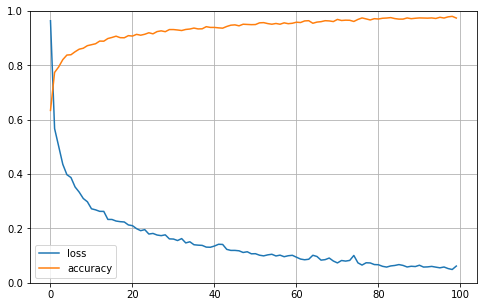

In [18]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


# <CENTER> AVALIANDO O MODELO

In [19]:
#Preparando os dados de teste

X_test = escaler.fit_transform(X_test)
y_teste1 = encoder.fit_transform(np.ravel(y_test))
encoder2 = OneHotEncoder()
y_teste2 = encoder2.fit_transform((y_test))


In [20]:
rede_neural.evaluate(X_test, y_teste1)

20/20 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.8824


[0.5954556465148926, 0.8824451565742493]

In [21]:
y_pred = rede_neural.predict(X_test)

20/20 [==============================] - 0s 2ms/step


In [22]:
#Classification report do modelo

print(classification_report(y_teste2.toarray().argmax(axis=1), y_pred.round().argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       127
           1       0.96      0.94      0.95        54
           2       0.85      0.92      0.88        48
           3       0.93      0.87      0.90       183
           4       0.84      0.83      0.83       138
           5       0.86      0.91      0.88        88

    accuracy                           0.88       638
   macro avg       0.88      0.90      0.89       638
weighted avg       0.88      0.88      0.88       638



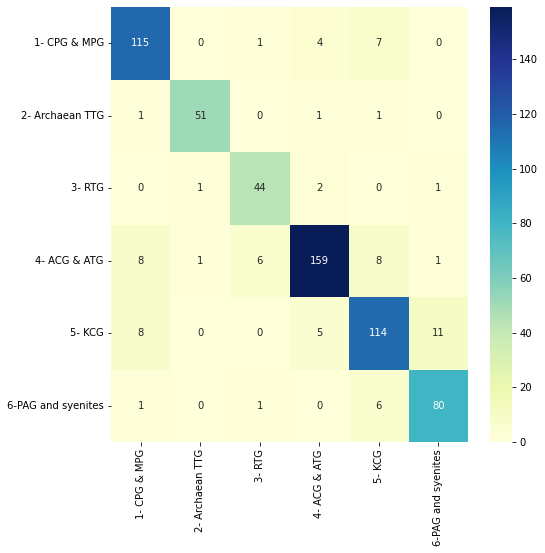

In [23]:
#Plotando a matriz de confusão

plot_confusion_matrix(y_teste2.toarray().argmax(axis=1), y_pred.round().argmax(axis=1))